In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
path ='/gdrive/My Drive/Online_ML : Weekends Nov 2020/Data/'

In [2]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline


In [5]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv(path+'recipes_muffins_cupcake.csv')
recipes

,Type,Flour,Sugar
0,Muffin,55,3
1,Muffin,47,12
2,Muffin,47,18
3,Muffin,45,17
4,Muffin,50,12
5,Muffin,55,3
6,Muffin,54,7
7,Muffin,47,10
8,Muffin,50,17
9,Muffin,50,17


In [6]:
# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Sugar']

In [7]:
from sklearn.preprocessing import LabelEncoder


recipe_type_encoder = LabelEncoder()

recipes['Type'] = recipe_type_encoder.fit_transform(recipes['Type'])
recipes.head()

,Type,Flour,Sugar
0,1,55,3
1,1,47,12
2,1,47,18
3,1,45,17
4,1,50,12


In [9]:
# Specify inputs for the model
x = recipes[['Flour','Sugar']]
x

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12
5,55,3
6,54,7
7,47,10
8,50,17
9,50,17


In [10]:
y = recipes['Type']
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Type, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

model.fit(x,y)

LogisticRegression(max_iter=10000)

In [12]:
theta_0 = model.intercept_[0]
print('theta_0 ={}'.format(theta_0))

theta_0 =-39.15124062620958


with θ₀ = -39.15124062620958, the logistic regression model is biased towards predicting the positive outcome (e.g., class 1) when the other features are zero. The exact interpretation of this value would depend on the specific context and the range of feature values used in the model.

In [13]:
theta = model.coef_[0]
print('theta_1 ={}, theta_2 ={}'.format(theta[0], theta[1]))

theta_1 =0.980006846713301, theta_2 =-0.20867996297739963


In [14]:
print('Min and Max of Sugar ={},{}'.format(recipes['Sugar'].min(), recipes['Sugar'].max()))
print('Min and Max of Flour ={},{}'.format(recipes['Flour'].min(), recipes['Flour'].max()))

Min and Max of Sugar =3,31
Min and Max of Flour =34,55


In [15]:
Flour_for_line = np.linspace(30,60)
sugar_for_line = -(theta_0 + theta[0]*Flour_for_line)/theta[1]

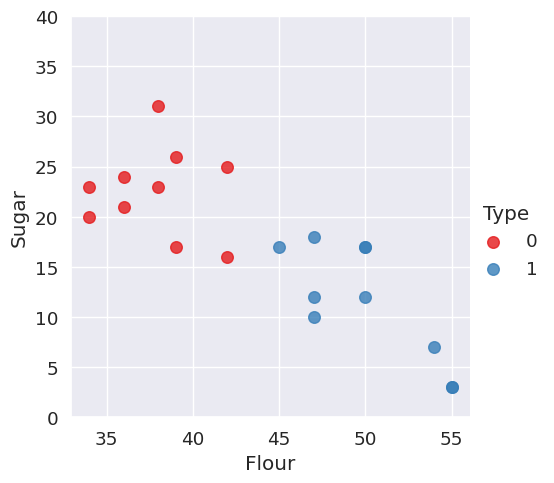

In [17]:
import seaborn as sns

# Assuming 'Flour', 'Sugar', and 'Type' are column names in your 'recipes' dataframe
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.ylim(0, 40)
plt.show()


From the above plot, we see this is non linearly separable data. We choose SVM to handle this case.  By using different kernel functions (e.g., linear, polynomial, radial basis function), SVMs can map the data to higher-dimensional feature spaces, where non-linear relationships can be more easily captured. If the given dataset contains non-linearly separable classes, an SVM with an appropriate kernel can help identify complex decision boundaries.

In [18]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x,y)

SVC(kernel='linear')

In [19]:
svm_theta_0 = svm_model.intercept_[0]
print('SVM theta_0={}'.format(svm_theta_0))

SVM theta_0=-28.993497423663204


In [20]:
svm_theta = svm_model.coef_[0]
print('SVM theta 1 = {}, theta 2 = {}'.format(svm_theta[0], svm_theta[1]))

SVM theta 1 = 0.6665372621624517, theta 2 = -4.852668907817659e-05


In [21]:
flour_line = np.linspace((x['Flour'].min())-5,(x['Flour'].max())+5)
sugar_line = -(svm_theta_0 + svm_theta[0]*flour_line)/svm_theta[1]

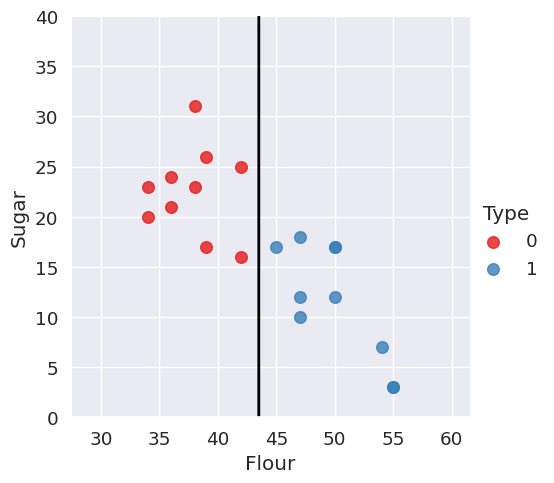

In [23]:

sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(flour_line, sugar_line, linewidth=2, color='black')
plt.ylim(0, 40)
plt.show()


In [24]:
svm_model.support_

array([11, 15,  3], dtype=int32)

In [25]:
svm_model.support_vectors_

array([[42., 16.],
       [42., 25.],
       [45., 17.]])

In [26]:
svm_model.n_support_

array([2, 1], dtype=int32)

Predict New Case

In [27]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(Flour, Sugar):
    if(svm_model.predict([[Flour, Sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [29]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40, 20)

You're looking at a muffin recipe!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


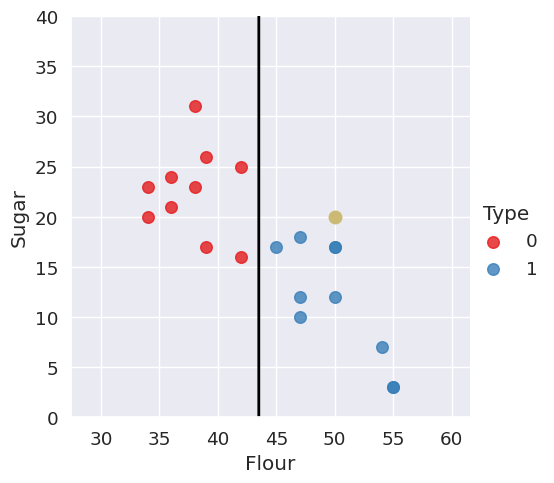

In [31]:
# Plot the point to visually see where the point lies

sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(flour_line, sugar_line, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize=9)
plt.ylim(0, 40)
plt.show()


One potential business use case for this data could be in the baking industry, specifically in the production of baked goods like cakes or pastries. The 'Flour' and 'Sugar' variables might represent the quantities of flour and sugar used in a recipe, while the 'Type' variable could indicate the type or category of the baked goods (e.g., chocolate cake, vanilla cake, pastries).

Using this dataset, a business could analyze the relationship between the quantities of flour and sugar and the type of baked goods produced. Here are a few possible use cases:

Recipe Optimization: By examining the data, a business can identify patterns between the quantities of flour and sugar and the type of baked goods. This information can help optimize recipes by adjusting the proportions of flour and sugar for different types of products. For example, the analysis might reveal that chocolate cakes require a higher proportion of flour and sugar compared to vanilla cakes.

Cost Control: Analyzing the data can provide insights into the costs associated with different types of baked goods. By understanding the relationship between the quantities of flour and sugar and the resulting products, a business can estimate the cost of ingredients and optimize production planning accordingly. This can help in budgeting, pricing, and cost control efforts.

Quality Control: The data can be utilized to monitor the quality and consistency of baked goods. By establishing correlations between the quantities of flour and sugar and the desired characteristics of the products, businesses can set quality control measures. For example, if certain types of pastries consistently require a specific range of flour and sugar amounts to achieve the desired texture and taste, these ranges can be used as quality benchmarks during production.

New Product Development: With the knowledge gained from the data, businesses can explore the creation of new baked goods or variations of existing products. By experimenting with different combinations of flour and sugar, the business can develop innovative recipes and introduce new offerings to meet customer demands and preferences.

Market Segmentation: The 'Type' variable can be utilized for market segmentation and targeting specific customer segments. By understanding which types of baked goods are more popular or have different preferences in terms of flour and sugar quantities, businesses can tailor their marketing efforts and product offerings to specific consumer groups.

Overall, this dataset can provide valuable insights for recipe optimization, cost control, quality control, new product development, and market segmentation in the baking industry. These insights can help businesses make data-driven decisions and improve their products, processes, and profitability.